# <center> PV PLANTS ANALYSIS [TETTOIA FV1] </center>

 <img src="Dataset e immagini\gfv13ds.PNG">

In [1]:
Voc_mod=23.63 #V
Isc_mod=8.67 #A
Vmp_mod=18.93 #V
Imp_mod=8.19 #A

#Livello moduli
moduli_stringa=24

#Max power point
Vmp_str=Vmp_mod*moduli_stringa #V
Imp_str=Imp_mod #A

#Max intensity
Voc_str=Voc_mod*moduli_stringa #V
Isc_str=Isc_mod #A

#Livello stringa
n_stringhe_inverter=2
n_stringhe_mppt=1

#Max power point
Vmp_to_inv=Vmp_str
Imp_to_inv=Imp_str*n_stringhe_inverter

#Max intensity
Voc_to_inv=Voc_str
Isc_to_inv=Isc_str*n_stringhe_inverter

* **Degradation di I, V, P con T_mod**

$
\textit{NB: E' importante verificare le unità di misura dei coefficienti!!!}
$
<br><br>
$
\textit{Nel caso di coefficienti NON ADIMENSIONALI, a correzione sarà del tipo: }
\\
\\
V_{nom}=V_{misurata}+Correzione
$
<br><br>
$
Correzione=-moduli_{stringa} \times Temp_{corretta} \times \beta
$

$
\textit{Quindi }\beta \textit{  dovrà essere dimensionalmente: } [\frac{Volt}{°C}] 
$
<br><br>
$
\textit{Nel caso di coefficienti ADIMENSIONALI, invece si fa la formula inversa della nota relazione: }
\\
\\
V_{nom}[1-Correzione]=V_{misurata} \longrightarrow V_{nom}=[Correzione^{**}]+V_{misurata} 
$
<br><br>
$
Correzione^{**}=V_{nom} \times(Correzione)=-moduli_{stringa} \times Temp_{corretta} \times (V_{nom} \times \beta)
$

$
\textit{Quindi basterà moltiplicare  }\beta \textit{ per } V_{nom} \textit{ così da ottenere: } [\frac{Volt}{°C}] 
$

# DA QUI!!!!!!!!!!!!!!!!!

In [2]:
y_P=-0.0044 #Degradation potenza con Temperatura moduli
coeff_beta=-0.34/100*Vmp_mod #*Vmp_mod/Voc_mod #Coeff di V da verificare quale formula usare
coeff_alfa=0.07/100*Imp_mod #Imp_mod /Isc_mod #Coeff di I modificato

Grandezze | Livello stringa | Livello ingresso inverter
--- | --- | ---
Vmp | Vmp_str | Vmp_to_inv
Imp | Imp_str | Imp_to_inv

## LIBRERIE 

In [3]:
import numpy as np
import pandas as pd
import time
start = time.time()
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.cm as cm
import os
from os import listdir

* **Importo anche la mia libreria**

In [4]:
import vb_cluster as vbc 

## Calcolo la potenza nominale

In [5]:
Pnom=np.round(moduli_stringa*n_stringhe_inverter*Vmp_mod*Imp_mod/1000, decimals=3)
Pnom

7.442

* #### Inizializzo l'elenco delle figure

In [6]:
nfig=0

* ### Funzione trova dati

In [7]:
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    #Funzione per trovare i file csv in un certo percorso
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

* ### Files disponibili nella cartella di lavoro

In [8]:
path_to_dir=r"C:\Users\BARONE\AppData\Local\Programs\Python\Python37-32\Scripts\00-AA-Files per articolo\Dataset e immagini"
lista_impianti=find_csv_filenames(path_to_dir, suffix=".csv")
lista_impianti

['2018-12 GFV13 (10s).csv',
 '2018-12 GFV13 (1min).csv',
 'dataset_Tettoia FV1 2019-06-07.csv',
 'gfv13_dic-gen.csv',
 'gfv13_giu-set.csv',
 'Morlupo.csv',
 'test_generale.csv',
 'Tettoia FV1 All until 07062019.csv']

* ### Apro il file

In [9]:
path_to_file=path_to_dir+"\\dataset_Tettoia FV1 2019-06-07.csv"
IV_set=pd.read_csv(path_to_file, skiprows=0, delimiter=';')
IV_set.head(2)

,Unnamed: 0,Pot_ac,Pot_dc,V1,I1,V2,I2,Irr,Tair,Tmod,day,month,year,hours,minutes,PR_score
0,2158,2.44,0.035,0.0,0.0,13.6,2.64,401.7,0.0,13.5,23.0,12.0,2016.0,11.0,30.0,0.011708
1,2159,2.60,0.038,0.0,0.0,13.6,2.85,403.5,0.0,14.0,23.0,12.0,2016.0,11.0,45.0,0.012655


# oooooooooooooooooooooooooooooooooooooooooooooooooooooo
# Checkpoint

In [10]:
IV_set_corretto=IV_set.copy()
IV_set.head(3)

,Unnamed: 0,Pot_ac,Pot_dc,V1,I1,V2,I2,Irr,Tair,Tmod,day,month,year,hours,minutes,PR_score
0,2158,2.44,0.035,0.0,0.0,13.6,2.64,401.7,0.0,13.5,23.0,12.0,2016.0,11.0,30.0,0.011708
1,2159,2.60,0.038,0.0,0.0,13.6,2.85,403.5,0.0,14.0,23.0,12.0,2016.0,11.0,45.0,0.012655
2,2160,2.56,0.038,0.0,0.0,13.6,2.86,400.9,0.0,15.1,23.0,12.0,2016.0,12.0,0.0,0.012737


In [11]:
IV_set.describe()

,Unnamed: 0,Pot_ac,Pot_dc,V1,I1,V2,I2,Irr,Tair,Tmod,day,month,year,hours,minutes,PR_score
count,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.0,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000
mean,45084.398151,2.090029,2.036634,373.635934,2.547444,375.328657,2.710184,372.819833,0.0,25.249373,15.568130,6.107180,2017.777193,12.298449,22.400298,0.697817
std,25133.244631,1.622063,1.720112,114.046431,2.235853,110.459346,2.153292,286.760686,0.0,13.625719,8.710594,3.086611,0.784478,3.326334,16.753774,0.237454
min,2158.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.100000,0.0,-11.800000,1.000000,1.000000,2016.000000,5.000000,0.000000,0.000000
25%,20980.250000,0.524000,0.388000,381.600000,0.460000,382.800000,0.680000,104.125000,0.0,15.100000,8.000000,3.000000,2017.000000,10.000000,0.000000,0.722164
50%,50134.500000,1.860000,1.677500,404.200000,2.000000,404.300000,2.330000,323.300000,0.0,24.700000,16.000000,6.000000,2018.000000,12.000000,15.000000,0.772960
75%,66442.750000,3.500000,3.544000,423.900000,4.390000,423.600000,4.470000,605.475000,0.0,35.100000,23.000000,9.000000,2018.000000,15.000000,30.000000,0.815348
max,85678.000000,10.704000,6.271000,529.900000,7.990000,528.600000,7.960000,1109.600000,0.0,59.900000,31.000000,12.000000,2019.000000,20.000000,45.000000,0.989843


# Correzione in T e Irr

* #### Seguendo la norma:

  Importo la mia libreria

In [12]:
import vb_ITCorrection as vbitc
vbitc.IT_correction.info()


                - Fornire in input un file di tipo <pandas.core.frame.DataFrame>
                - Le colonne vanno ordinate e nominate così:
                  ['I1','V1','I2','V2', 'I3','V3','In','Vn','Irr', 'Tmod']
             


* #### Creo un oggetto di classe IT_correction, per poi correggerlo

In [13]:
IV_set_to_correct=vbitc.IT_correction(IV_set_corretto,coeff_beta,coeff_alfa)

* #### Correggo per temperatura e irraggiamento

In [14]:
IV_set_corretto=IV_set_to_correct.correction_one(moduli_stringa,Isc_mod,n_stringhe_mppt,rs=None)

* #### Confronto pre-post correzione

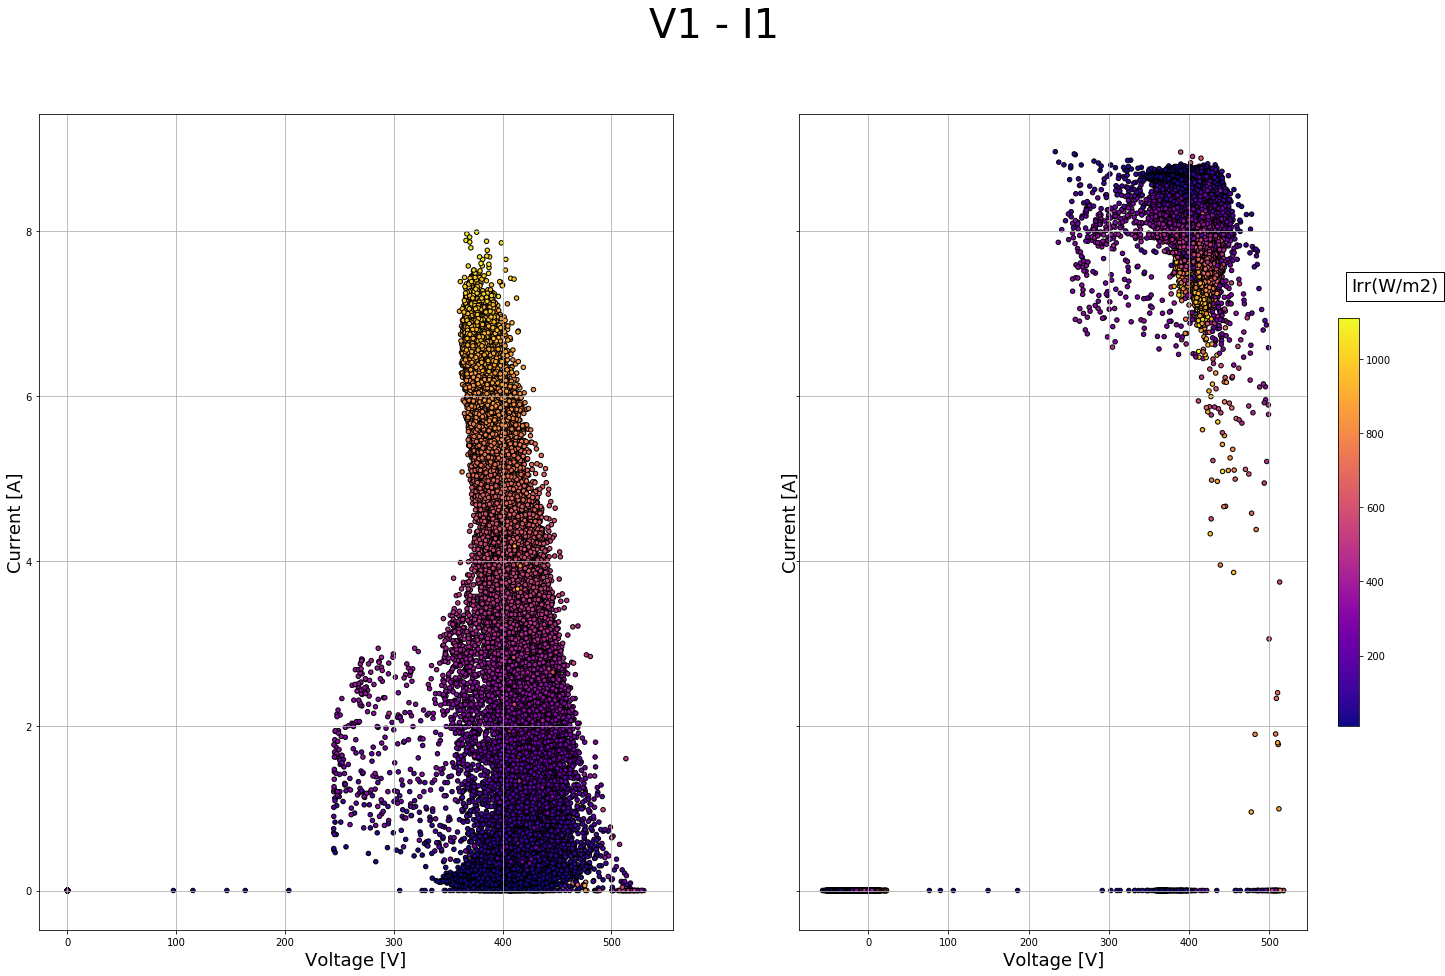

In [16]:
nfig+=1
graph_font_size=18
fig, (ax1, ax2) =plt.subplots(1,2,figsize=(25,15), sharey=True)
fig.suptitle('V1 - I1',fontsize=40)
xx=IV_set['V1']
yy=IV_set['I1']

# Set corretto:
ax2.scatter(IV_set_corretto["V1"].values,IV_set_corretto["I1"].values,
            s=20, c=IV_set_corretto['Irr'], cmap='plasma', edgecolor='k')

# Set non corretto
mappable_graph=ax1.scatter(xx,yy, s=20, c=IV_set['Irr'], cmap='plasma', edgecolor='k')
temp_colorbar=fig.colorbar(mappable_graph, shrink=0.5, pad=0.05)
temp_colorbar.set_label('Irr(W/m2)', fontsize=18, rotation=0, position=(1,1.1),
                        horizontalalignment='center', bbox=dict(boxstyle='square', fc='w'))

ax2.set_xlabel('Voltage [V]',  fontsize=graph_font_size)
ax2.set_ylabel('Current [A]',  fontsize=graph_font_size, labelpad=0)
ax1.set_xlabel('Voltage [V]',  fontsize=graph_font_size)
ax1.set_ylabel('Current [A]',  fontsize=graph_font_size, labelpad=0)

ax1.grid()
ax2.grid()

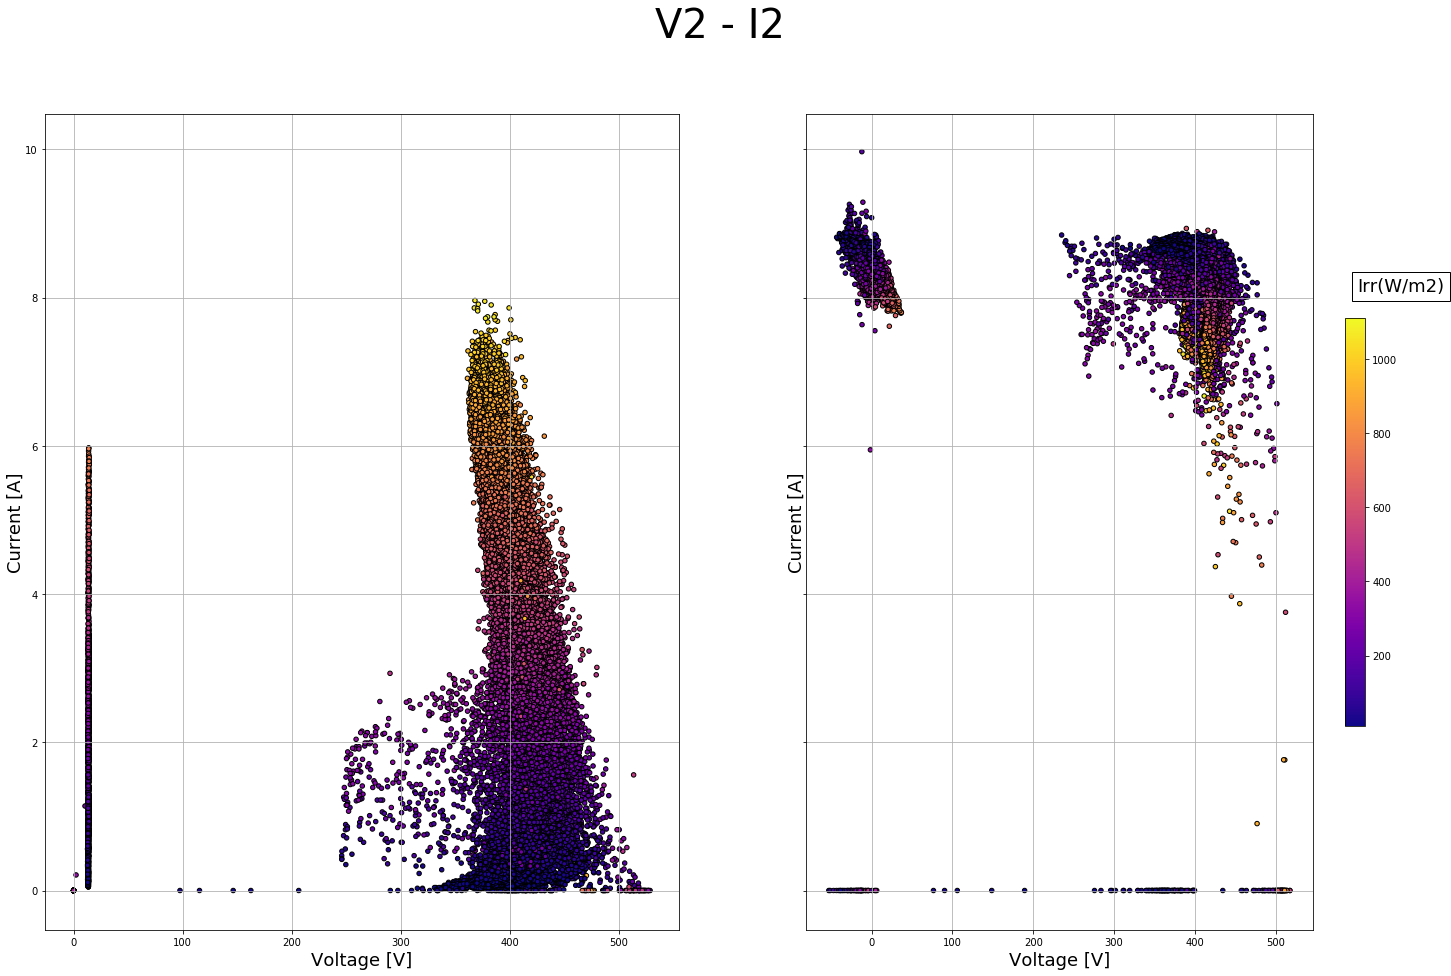

In [17]:
nfig+=1
graph_font_size=18
fig, (ax1, ax2) =plt.subplots(1,2,figsize=(25,15), sharey=True)
fig.suptitle('V2 - I2',fontsize=40)
xx=IV_set['V2']
yy=IV_set['I2']

# Set corretto:
ax2.scatter(IV_set_corretto["V2"].values,IV_set_corretto["I2"].values,
            s=20, c=IV_set_corretto['Irr'], cmap='plasma', edgecolor='k')

# Set non corretto
mappable_graph=ax1.scatter(xx,yy, s=20, c=IV_set['Irr'], cmap='plasma', edgecolor='k')
temp_colorbar=fig.colorbar(mappable_graph, shrink=0.5, pad=0.05)
temp_colorbar.set_label('Irr(W/m2)', fontsize=18, rotation=0, position=(1,1.1),
                        horizontalalignment='center', bbox=dict(boxstyle='square', fc='w'))

ax2.set_xlabel('Voltage [V]',  fontsize=graph_font_size)
ax2.set_ylabel('Current [A]',  fontsize=graph_font_size, labelpad=0)
ax1.set_xlabel('Voltage [V]',  fontsize=graph_font_size)
ax1.set_ylabel('Current [A]',  fontsize=graph_font_size, labelpad=0)

ax1.grid()
ax2.grid()

In [18]:
IV_set_corretto.describe()

,Unnamed: 0,Pot_ac,Pot_dc,V1,I1,V2,I2,Irr,Tair,Tmod,day,month,year,hours,minutes,PR_score
count,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.0,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000
mean,45084.398151,2.090029,2.036634,374.021138,7.380185,375.713862,8.095047,372.819833,0.0,25.249373,15.568130,6.107180,2017.777193,12.298449,22.400298,0.697817
std,25133.244631,1.622063,1.720112,118.372124,2.368286,114.943635,0.841477,286.760686,0.0,13.625719,8.710594,3.086611,0.784478,3.326334,16.753774,0.237454
min,2158.000000,0.000000,0.000000,-56.690050,0.000000,-52.982798,0.000000,10.100000,0.0,-11.800000,1.000000,1.000000,2016.000000,5.000000,0.000000,0.000000
25%,20980.250000,0.524000,0.388000,393.565894,7.644006,394.257589,7.810547,104.125000,0.0,15.100000,8.000000,3.000000,2017.000000,10.000000,0.000000,0.722164
50%,50134.500000,1.860000,1.677500,411.910286,8.097600,412.943760,8.229175,323.300000,0.0,24.700000,16.000000,6.000000,2018.000000,12.000000,15.000000,0.772960
75%,66442.750000,3.500000,3.544000,420.748735,8.508431,421.178541,8.562085,605.475000,0.0,35.100000,23.000000,9.000000,2018.000000,15.000000,30.000000,0.815348
max,85678.000000,10.704000,6.271000,518.003373,8.966657,517.503373,9.968153,1109.600000,0.0,59.900000,31.000000,12.000000,2019.000000,20.000000,45.000000,0.989843


In [19]:
Vmp_to_inv

454.32

# Calcolo i PR con i dati non corretti (IV_set)

In [20]:
Pnom_mppt=Pnom/2

In [21]:
for i in range(1,n_stringhe_inverter+1):
    IV_set_corretto["PR"+str(i)]=IV_set["V"+str(i)]*IV_set["I"+str(i)]/IV_set["Irr"]/Pnom_mppt

# Normalizzazione

* **Genero il database da normalizzare**

In [22]:
df_norm=IV_set_corretto.copy()

* #### Scelgo i riferimenti per la normalizzazione

#  <font color="red">ATTENZIONE </font> <BR>
    Il riferimento per la normalizzazione dipende dallo schema elettrico!
    In questo caso ho due stringhe per inverter ma una stringa per mppt quindi :
    La tensione che arriva all'MPPT è la stessa che arriva all'inverter 
    MA
    La corrente che arriva all'MPPT è la metà di quella che arriva all'inverter globalmente!!!! 

In [23]:
[rif_V, rif_I]=[Vmp_to_inv,Imp_to_inv/2]
#[rif_V, rif_I]=[Vmp_to_inv,Isc_to_inv]

* #### Normalizzo sfruttando la mia libreria

In [24]:
df_norm=IV_set_to_correct.normalize(rif_V, rif_I)

In [25]:
df_norm.describe()

,Unnamed: 0,Pot_ac,Pot_dc,V1,I1,V2,I2,Irr,Tair,Tmod,day,month,year,hours,minutes,PR_score,PR1,PR2
count,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.0,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000
mean,45084.398151,2.090029,2.036634,0.823255,0.901121,0.826981,0.988406,372.819833,0.0,25.249373,15.568130,6.107180,2017.777193,12.298449,22.400298,0.697817,0.689708,0.710122
std,25133.244631,1.622063,1.720112,0.260548,0.289168,0.253001,0.102744,286.760686,0.0,13.625719,8.710594,3.086611,0.784478,3.326334,16.753774,0.237454,0.245126,0.235302
min,2158.000000,0.000000,0.000000,-0.124780,0.000000,-0.116620,0.000000,10.100000,0.0,-11.800000,1.000000,1.000000,2016.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,20980.250000,0.524000,0.388000,0.866275,0.933334,0.867797,0.953669,104.125000,0.0,15.100000,8.000000,3.000000,2017.000000,10.000000,0.000000,0.722164,0.716864,0.729464
50%,50134.500000,1.860000,1.677500,0.906652,0.988718,0.908927,1.004783,323.300000,0.0,24.700000,16.000000,6.000000,2018.000000,12.000000,15.000000,0.772960,0.769459,0.781336
75%,66442.750000,3.500000,3.544000,0.926107,1.038880,0.927053,1.045432,605.475000,0.0,35.100000,23.000000,9.000000,2018.000000,15.000000,30.000000,0.815348,0.812302,0.826501
max,85678.000000,10.704000,6.271000,1.140173,1.094830,1.139072,1.217113,1109.600000,0.0,59.900000,31.000000,12.000000,2019.000000,20.000000,45.000000,0.989843,1.263604,1.106252


## Analisi I-V-Irr

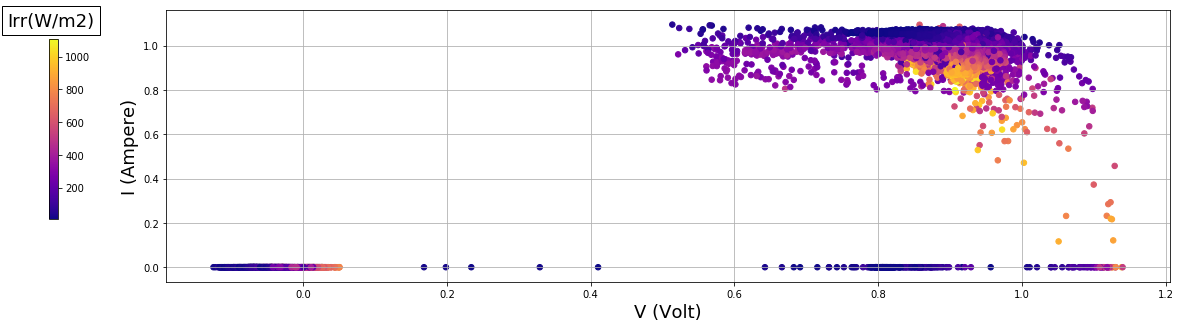

In [26]:
nfig+=1
graph_font_size=18
fig, ax1 =plt.subplots(1,1,figsize=(18,5))
shrink_option=5
position_option=(0,1.15)
pdim=30 

mappable_graph=ax1.scatter(df_norm["V1"].values,df_norm["I1"].values, s=pdim, c=df_norm['Irr'], cmap='plasma')#, edgecolor='k'
ax1.grid()
ax1.set_xlabel('V (Volt)',  fontsize=graph_font_size)
ax1.set_ylabel('I (Ampere)',  fontsize=graph_font_size)

#Per la colorbar:
ax1_colbar=fig.add_axes([-0.05, 0.5, 0.1, 0.1], visible=False)
temp_colorbar=fig.colorbar(mappable_graph, shrink=shrink_option, pad=-0.5)
temp_colorbar.set_label("Irr(W/m2)", fontsize=18, rotation=0, position=position_option,
                        ha='right',bbox=dict(boxstyle='square', fc='w'))

## STANDARDIZZAZIONE

* **Al fine di centrare i dati in zero e di spingerli lontano all'aumentare della loro distanza dal centro, effettuo una standardizzazione dei dati.**

## VALORI DI RIFERIMENTO
Prendo dei valori di riferimento universali così da svincolarmi dai moduli e dal clima


In [27]:
V_mean_rif=1
I_mean_rif=1
V_std_rif=0.02
I_std_rif=0.02

* **Standardizzo e mostro il risultato della trasformazione**

In [28]:
s_IV_set_corretto=IV_set_to_correct.standardize(V_std_rif=V_std_rif,
                                                I_std_rif=I_std_rif,
                                                V_mean_rif=V_mean_rif,
                                                I_mean_rif=I_mean_rif)
s_IV_set_corretto["days"]=IV_set.index

* **Analisi statistica**

In [29]:
s_IV_set_corretto.describe()

,Unnamed: 0,Pot_ac,Pot_dc,V1,I1,V2,I2,Irr,Tair,Tmod,day,month,year,hours,minutes,PR_score,PR1,PR2,days
count,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.0,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000,28886.000000
mean,45084.398151,2.090029,2.036634,-8.837258,-4.943925,-8.650966,-0.579686,372.819833,0.0,25.249373,15.568130,6.107180,2017.777193,12.298449,22.400298,0.697817,0.689708,0.710122,14442.500000
std,25133.244631,1.622063,1.720112,13.027395,14.458399,12.650074,5.137221,286.760686,0.0,13.625719,8.710594,3.086611,0.784478,3.326334,16.753774,0.237454,0.245126,0.235302,8338.814274
min,2158.000000,0.000000,0.000000,-56.239000,-50.000000,-55.831000,-50.000000,10.100000,0.0,-11.800000,1.000000,1.000000,2016.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20980.250000,0.524000,0.388000,-6.686268,-3.333298,-6.610144,-2.316564,104.125000,0.0,15.100000,8.000000,3.000000,2017.000000,10.000000,0.000000,0.722164,0.716864,0.729464,7221.250000
50%,50134.500000,1.860000,1.677500,-4.667384,-0.564101,-4.553645,0.239162,323.300000,0.0,24.700000,16.000000,6.000000,2018.000000,12.000000,15.000000,0.772960,0.769459,0.781336,14442.500000
75%,66442.750000,3.500000,3.544000,-3.694672,1.944020,-3.647370,2.271579,605.475000,0.0,35.100000,23.000000,9.000000,2018.000000,15.000000,30.000000,0.815348,0.812302,0.826501,21663.750000
max,85678.000000,10.704000,6.271000,7.008647,4.741494,6.953620,10.855632,1109.600000,0.0,59.900000,31.000000,12.000000,2019.000000,20.000000,45.000000,0.989843,1.263604,1.106252,28885.000000


# Grafico normalizzato, corretto e standardizzato

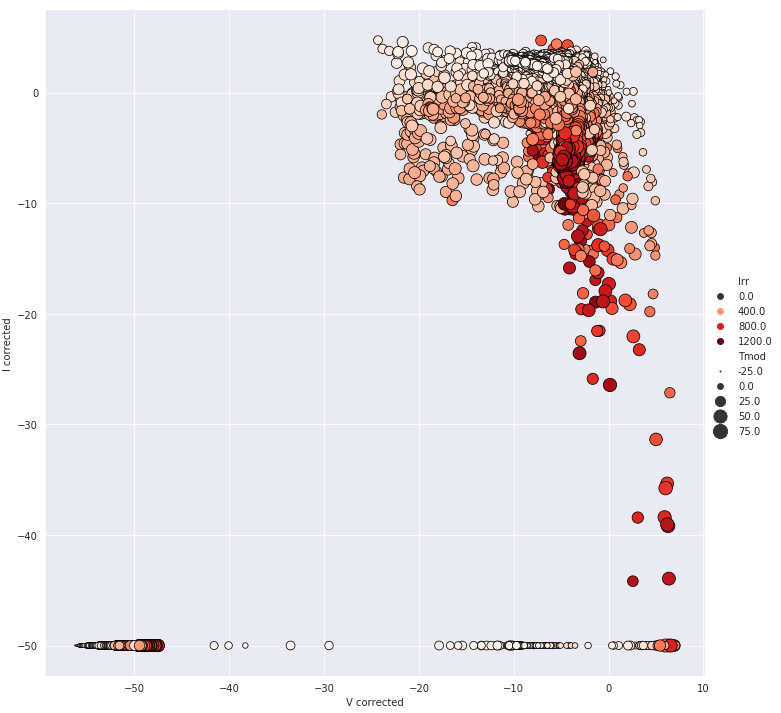

In [30]:
with sns.axes_style("darkgrid"):
    ax1=sns.relplot(x="V1", y="I1",hue="Irr", data=s_IV_set_corretto,palette="Reds",
                sizes=(1,200), size="Tmod",
                aspect=1, height=10, edgecolor='k')
    ax1.set(xlabel='V corrected',ylabel='I corrected')

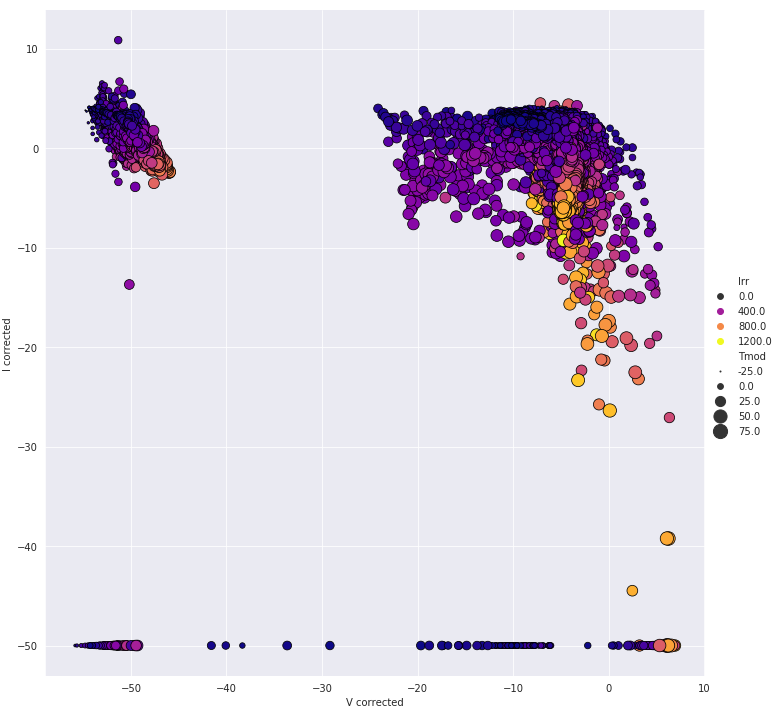

In [31]:
with sns.axes_style("darkgrid"):
    ax1=sns.relplot(x="V2", y="I2",hue="Irr", data=s_IV_set_corretto,palette="plasma",
                sizes=(1,200), size="Tmod",
                aspect=1, height=10, edgecolor='k')
    ax1.set(xlabel='V corrected',ylabel='I corrected')

# NB:
## Attuando la normalizzazione il punto corrispondente alla zona di normale funzionamento sarà <font color="red">centrato in  zero</font> se funzionante correttamente

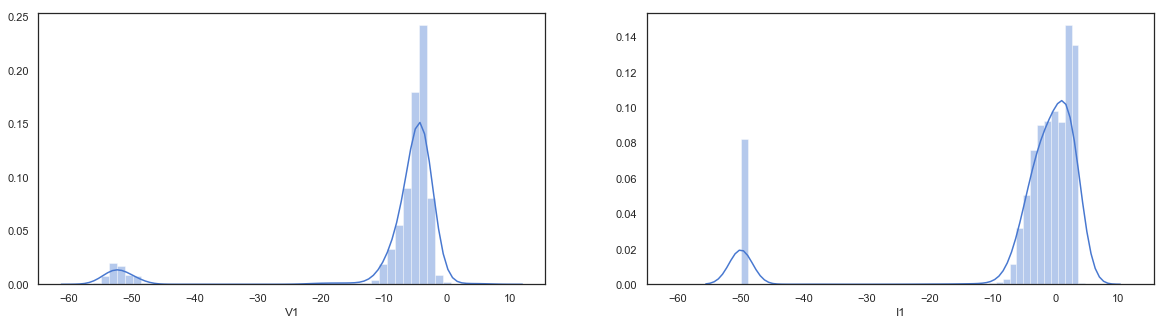

In [32]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
sns.distplot(s_IV_set_corretto["V1"], color="b", bins=50, ax=axes[0])
sns.distplot(s_IV_set_corretto["I1"], color="b", bins=50, ax=axes[1]);

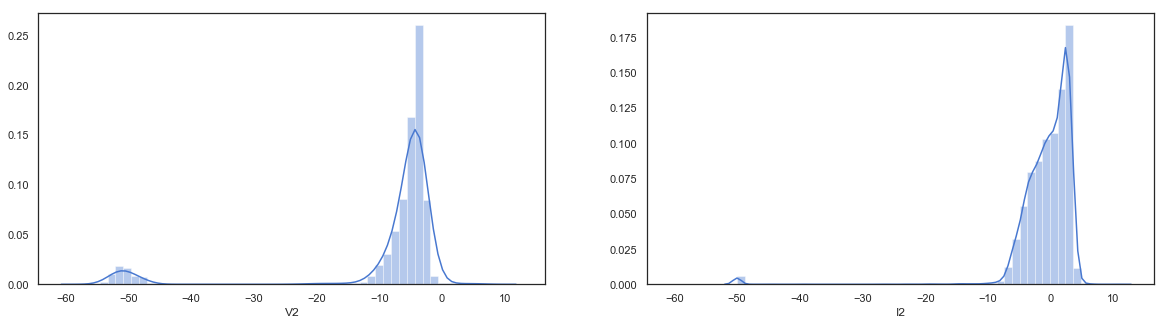

In [33]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
sns.distplot(s_IV_set_corretto["V2"], color="b", bins=50, ax=axes[0])
sns.distplot(s_IV_set_corretto["I2"], color="b", bins=50, ax=axes[1]);

# CLUSTERING TIME 

# Importo la libreria da me creata così da utilizzarne una per tutti gli impianti

In [34]:
import vb_cluster as vbc

# TETTOIA 1, SEZIONE 1 --> V1, I1

* #### Preparo le grandezze da analizzare  e da splittare in train/split

In [35]:
id_V='V2'
id_I='I2'

In [36]:
universal_test_set=vbc.dati(s_IV_set_corretto[id_V].values,s_IV_set_corretto[id_I].values)
Irr_set=s_IV_set_corretto["Irr"].copy().values
Tmod_set=s_IV_set_corretto["Tmod"].values
days_set=s_IV_set_corretto["days"].copy().values

* #### Qui faccio il train test split vero e proprio

In [37]:
from sklearn.model_selection import train_test_split
my_test_size=0.2
X_train, universal_test_set, y_irr, Irr_set, z_tmod,Tmod_set,k_days, days_set = train_test_split(universal_test_set,Irr_set,Tmod_set,days_set,
                                                                                                 test_size=my_test_size, random_state=101)

* **Sulla scelta dei centri:**

  1 - Dal momento che **edge=-1/0.02=-50** è la massima deviazione, avrò dei punti con x o y pari a -50 solo quando I=V=0
  
  2 - Quando I o V sono pari a metà del loro valore atteso si troverano intorno a x,y pari a -25

In [38]:
n_guess=8
tol=0.01
edge=-1/V_std_rif # V_std_rif=I_std_rif=0.02, quindi edge è la massima deviazione!
_6centroids=np.zeros((n_guess,1,2))
_6centroids[0,0]=[0,0] #Punto medio di funzionamento
_6centroids[1,0]=[0,edge/3*2] #Punto Arancione
_6centroids[4,0]=[0,edge/3] #Punto Viola
_6centroids[5,0]=[0,edge] #Punto Marrone
_6centroids[2,0]=[edge/6,0] #Punto Verde
_6centroids[3,0]=[edge/2.5,edge/10] #Punto Rosso
_6centroids[6,0]=[edge/6,-0.5] #Punto Rosa
_6centroids[7,0]=[edge/3,0] #Punto Grigio


_6first_guess=_6centroids.copy()

In [39]:
t1=vbc.cluster_data(_6centroids,universal_test_set,tol,_6first_guess)

In [40]:
print(t1.info())


              Esempio di utilizzo:

              1 - Dichiaro il numero di iterazioni:
                  iterations=1
              2 - Creo oggetto di classe cluster_data e lo chiamo t1:
                  t1=cluster_data(_6centroids,universal_test_set,tol,_6first_guess)
              3 - Applico il metodo cluster_iteration specificando il numero di iterazioni e l'oggetto sulle quali lavoro:
                  result1=t1.cluster_iteration(iterations,t1)
              4 - Per antitrasformare i dati uso la funzione (esterna alla classe) "antitrasform_cluster", descritta in basso

             


Convergenza non raggiunta in 10 iterazioni


<Figure size 432x288 with 0 Axes>

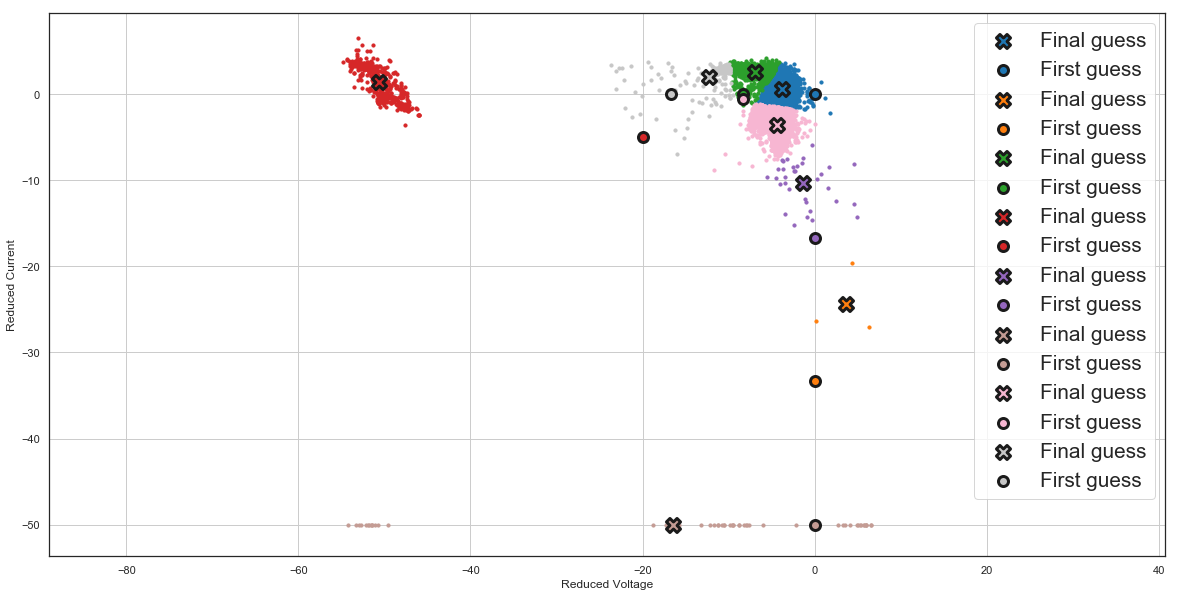

In [41]:
iterations=10
result1=t1.cluster_iteration(iterations,t1)

## Risultato del test

bblbllblll


## CONSIDERAZIONI
**Aggiungere criteri riguardo la densità potrebbe  portare nuove soluzioni**



# ANALISI PUNTI DELL'INVERTER  NEI PIANI CONVENZIONALI 

* **Uso sempre la libreria da me creata (vbc)**
* **Purtroppo alla funzione anti_transform_cluster dovrò aggiungere un casino di input, dovrei spiegarli da qualche parte**
* **Specificare se i coefficienti sono adimensionali!!!!!**

* **IL set di colori:**

In [42]:
col = cm.tab20(np.linspace(0, 1, 10))

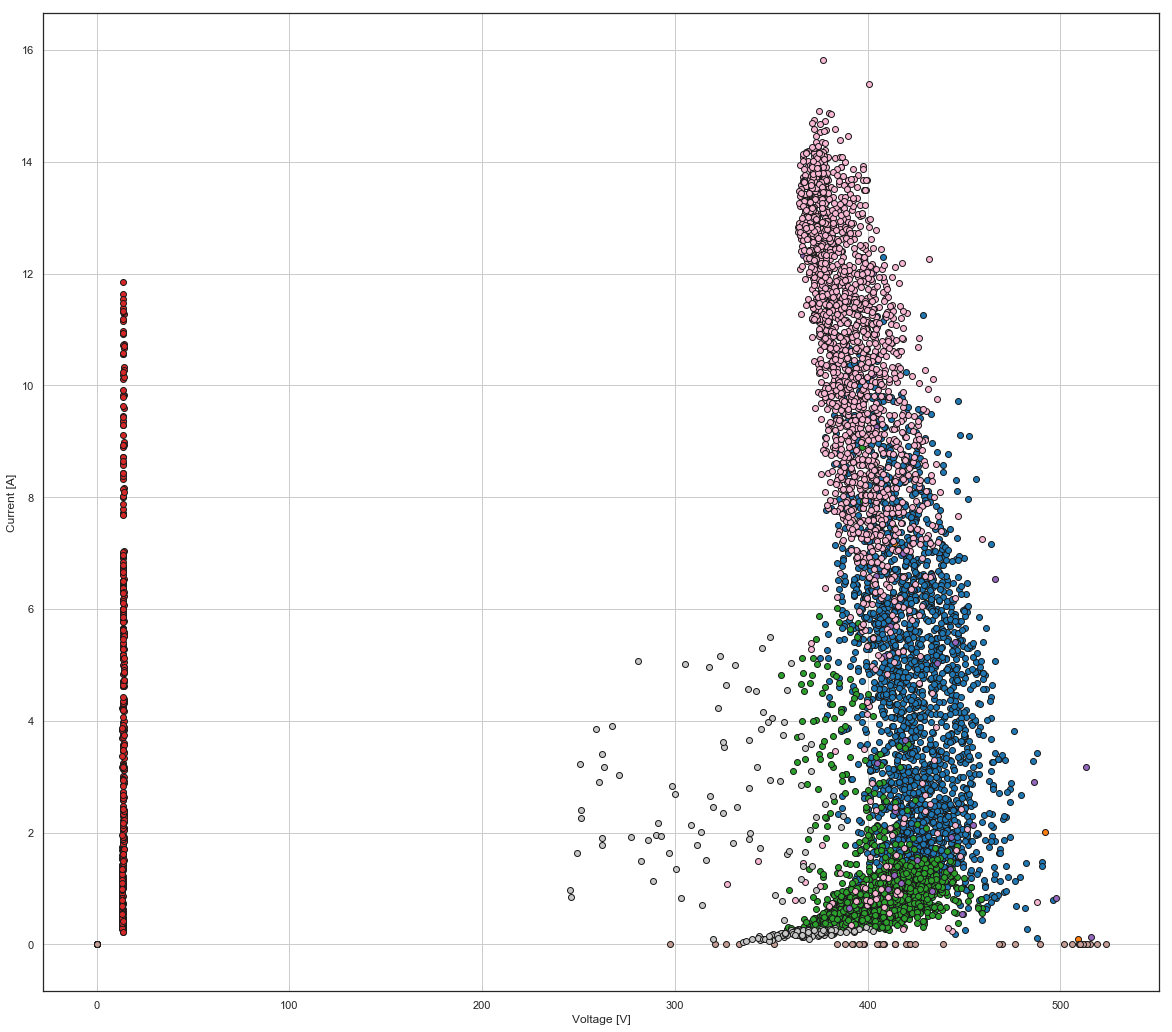

In [43]:
cluster_list1=list(result1)[1]
modules_string=moduli_stringa
[cluster_dict1, color_dict]=vbc.anti_transform_cluster(cluster_list1,coeff_beta,coeff_alfa,n_stringhe_inverter,
                                                       Irr_set,Tmod_set,days_set,
                                                       modules_string,V_std_rif, V_mean_rif,Vmp_to_inv,
                                                       I_std_rif,I_mean_rif,Imp_to_inv,Isc_mod,
                                                       adimensional_coeffs=False,
                                                       Temp_Irr_anticorrection=True,
                                                       print_on=True)

* #### Analizzo le distribuzioni dei valori per ogni cluster

In [44]:
cluster_dict1.keys()

dict_keys(['V0', 'I0', 'Irr0', 'days0', 'Tmod0', 'check0', 'V1', 'I1', 'Irr1', 'days1', 'Tmod1', 'check1', 'V2', 'I2', 'Irr2', 'days2', 'Tmod2', 'check2', 'V3', 'I3', 'Irr3', 'days3', 'Tmod3', 'check3', 'V4', 'I4', 'Irr4', 'days4', 'Tmod4', 'check4', 'V5', 'I5', 'Irr5', 'days5', 'Tmod5', 'check5', 'V6', 'I6', 'Irr6', 'days6', 'Tmod6', 'check6', 'V7', 'I7', 'Irr7', 'days7', 'Tmod7', 'check7'])

## Andamento del PR e della curva IV

In [45]:
cluster_dict1.keys()

dict_keys(['V0', 'I0', 'Irr0', 'days0', 'Tmod0', 'check0', 'V1', 'I1', 'Irr1', 'days1', 'Tmod1', 'check1', 'V2', 'I2', 'Irr2', 'days2', 'Tmod2', 'check2', 'V3', 'I3', 'Irr3', 'days3', 'Tmod3', 'check3', 'V4', 'I4', 'Irr4', 'days4', 'Tmod4', 'check4', 'V5', 'I5', 'Irr5', 'days5', 'Tmod5', 'check5', 'V6', 'I6', 'Irr6', 'days6', 'Tmod6', 'check6', 'V7', 'I7', 'Irr7', 'days7', 'Tmod7', 'check7'])

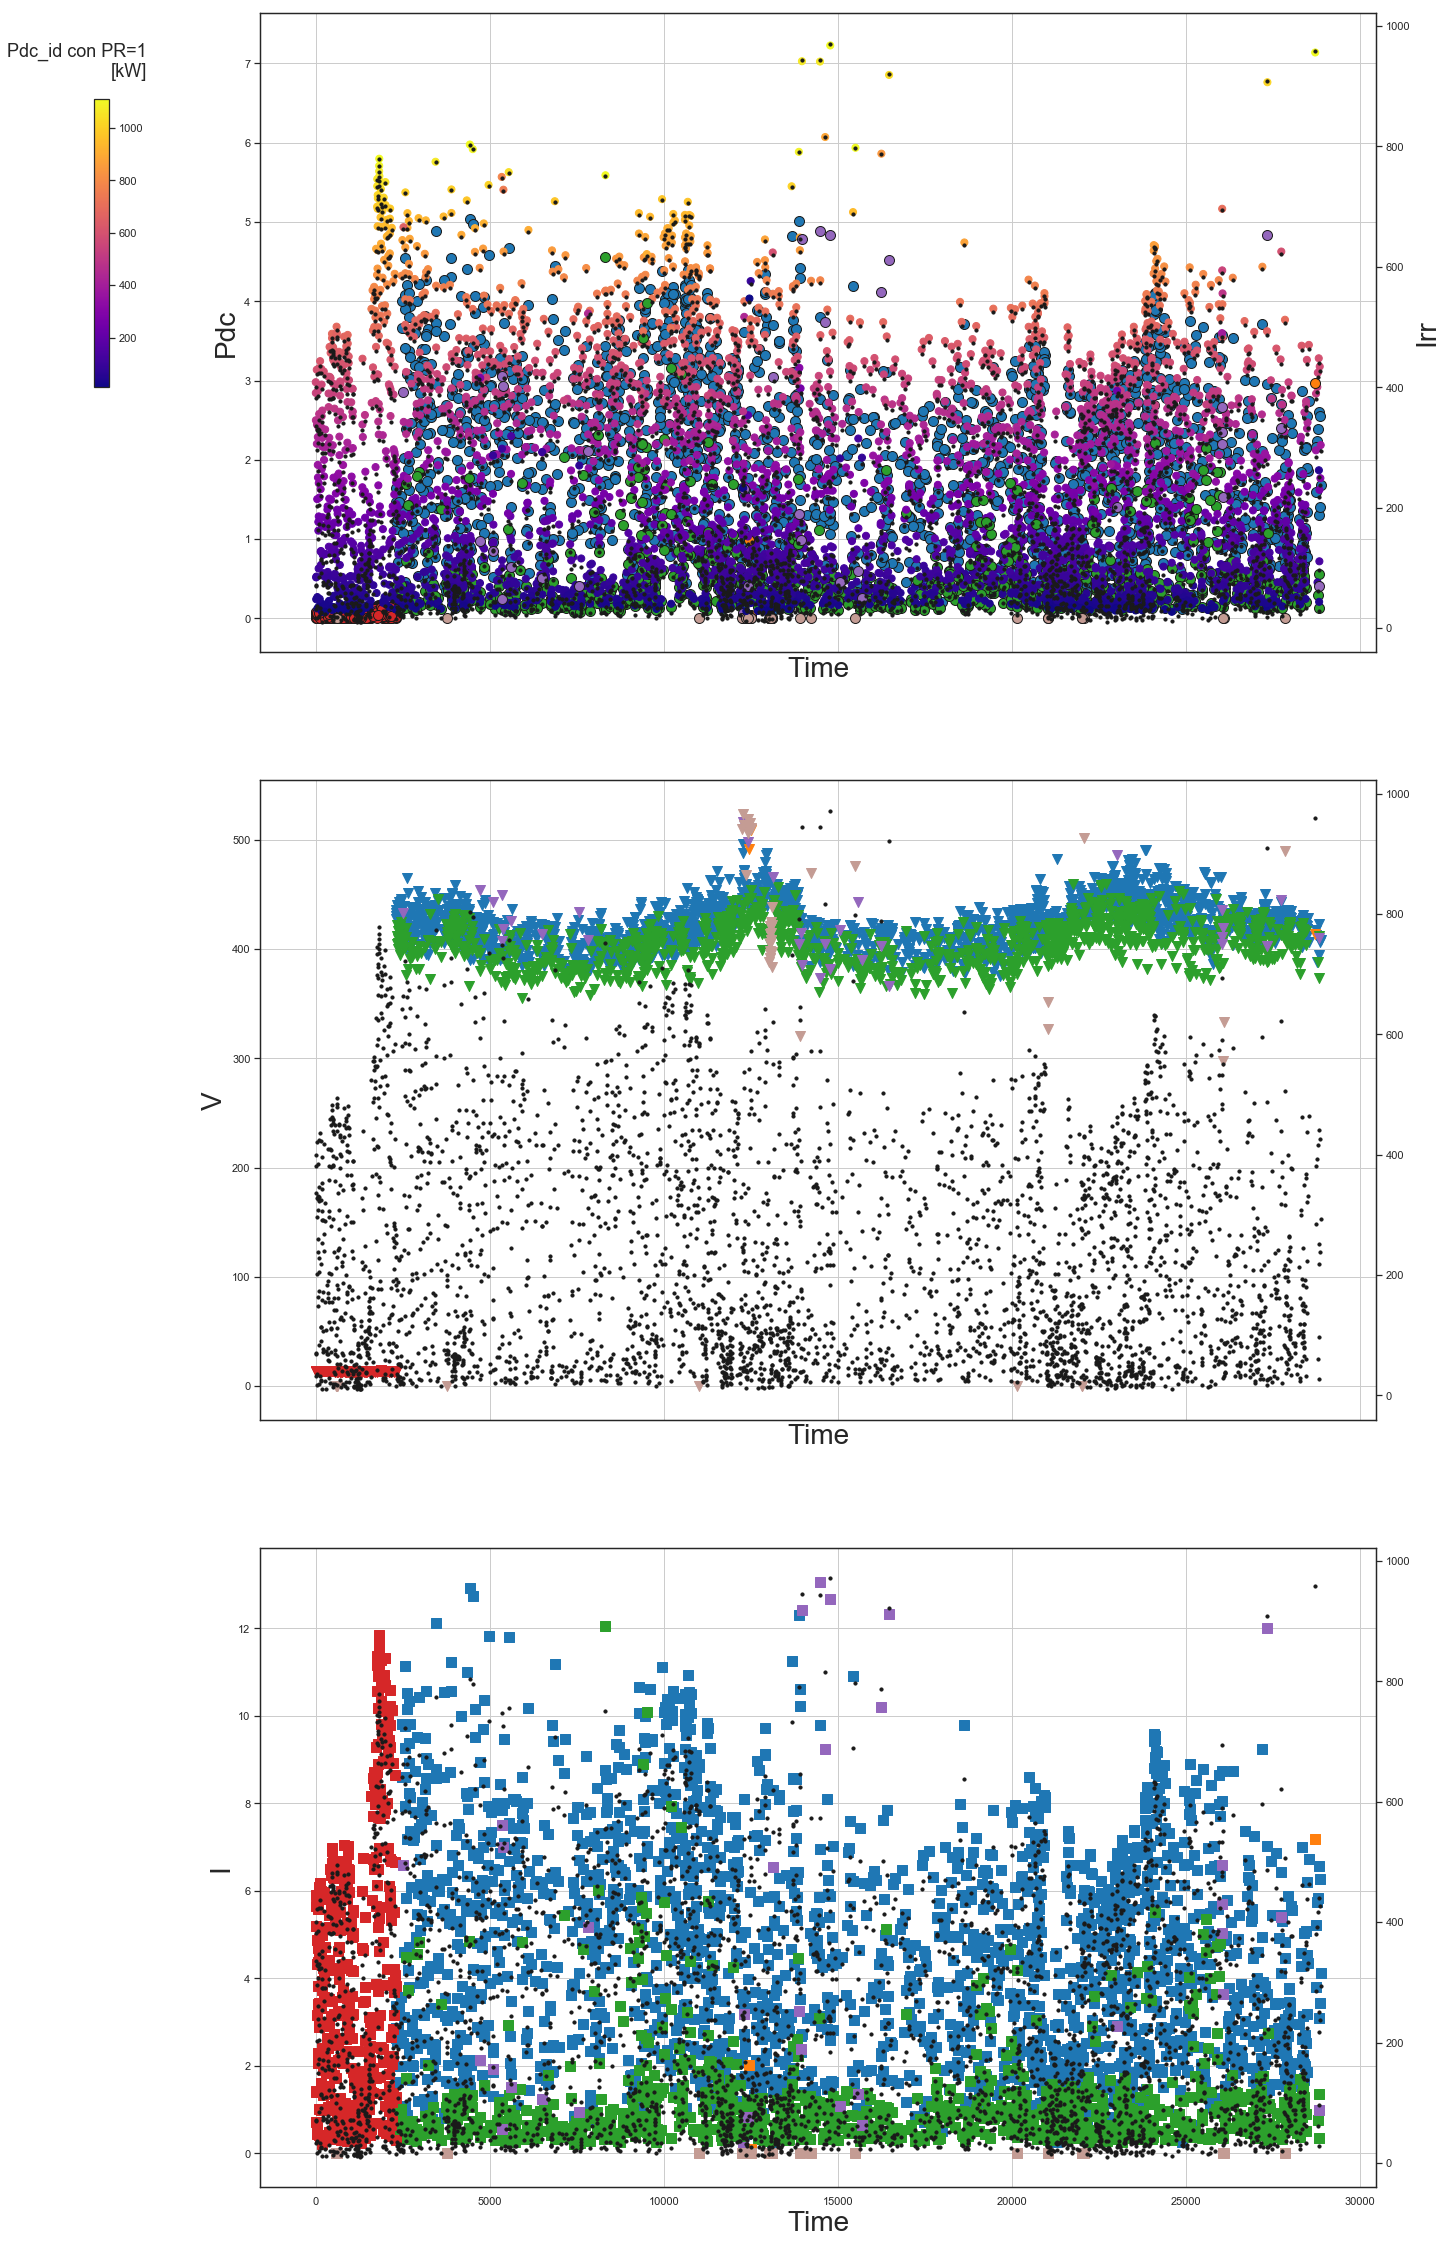

In [46]:
fig, (ax1, ax2,ax3)=plt.subplots(3,1,figsize=(20,40), sharex=True)

#Sdoppio gli assi
ax1_irr=ax1.twinx()
ax2_irr=ax2.twinx()
ax3_irr=ax3.twinx()

#I vari labels
ax1.set_xlabel('Time',  fontsize=28)
ax1.set_ylabel('Pdc',  fontsize=28)
ax2.set_xlabel('Time',  fontsize=28)
ax2.set_ylabel('V',  fontsize=28)
ax3.set_xlabel('Time',  fontsize=28)
ax3.set_ylabel('I',  fontsize=28)
ax1_irr.set_ylabel('Irr',  fontsize=28)

#Le griglie
ax1.grid();
ax2.grid();
ax3.grid();

#Nuova figura per i colori
ax1_colbar=fig.add_axes([-0.05, 0.75, 0.1, 0.1], visible=False)

#PR ideale
PR_id=1
max_Pdc=0
min_Pdc=100

for i in range(0,6):
    Pdc=cluster_dict1["V"+str(i)]*cluster_dict1["I"+str(i)]/1000
    ax1.scatter(cluster_dict1["days"+str(i)],Pdc, c=[col[i]], edgecolor='k',s=100)
    ax2.scatter(cluster_dict1["days"+str(i)],cluster_dict1["V"+str(i)], c=[col[i]], s=100, marker="v")#,edgecolor='k'
    ax3.scatter(cluster_dict1["days"+str(i)],cluster_dict1["I"+str(i)], c=[col[i]], s=100, marker="s")#,edgecolor='k'
    ax1_irr.scatter(cluster_dict1["days"+str(i)],cluster_dict1["Irr"+str(i)], c='k',s=10)
    ax2_irr.scatter(cluster_dict1["days"+str(i)],cluster_dict1["Irr"+str(i)], c='k',s=10)
    ax3_irr.scatter(cluster_dict1["days"+str(i)],cluster_dict1["Irr"+str(i)], c='k',s=10)
    #Disegno anche la Pdc ideale:
    Pdc_id=Pnom*cluster_dict1["Irr"+str(i)]/1000*PR_id    
    ax1.scatter(cluster_dict1["days"+str(i)],Pdc_id, c=Pdc_id, cmap='plasma',s=50)
   
    
# Per la colorbar
temp_colorbar=fig.colorbar(mappable_graph, shrink=1, pad=0.25,ax=ax1_colbar, anchor=(-5, 0) )
temp_colorbar.set_label("Pdc_id con PR="+str(PR_id)+"\n[kW]", fontsize=18, rotation=0, position=(0,1.2),
                        ha='right',bbox=dict(boxstyle='square', fc='w'))
